<a href="https://colab.research.google.com/github/sanskruti-1234/ML/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed

Calculating technical indicators...


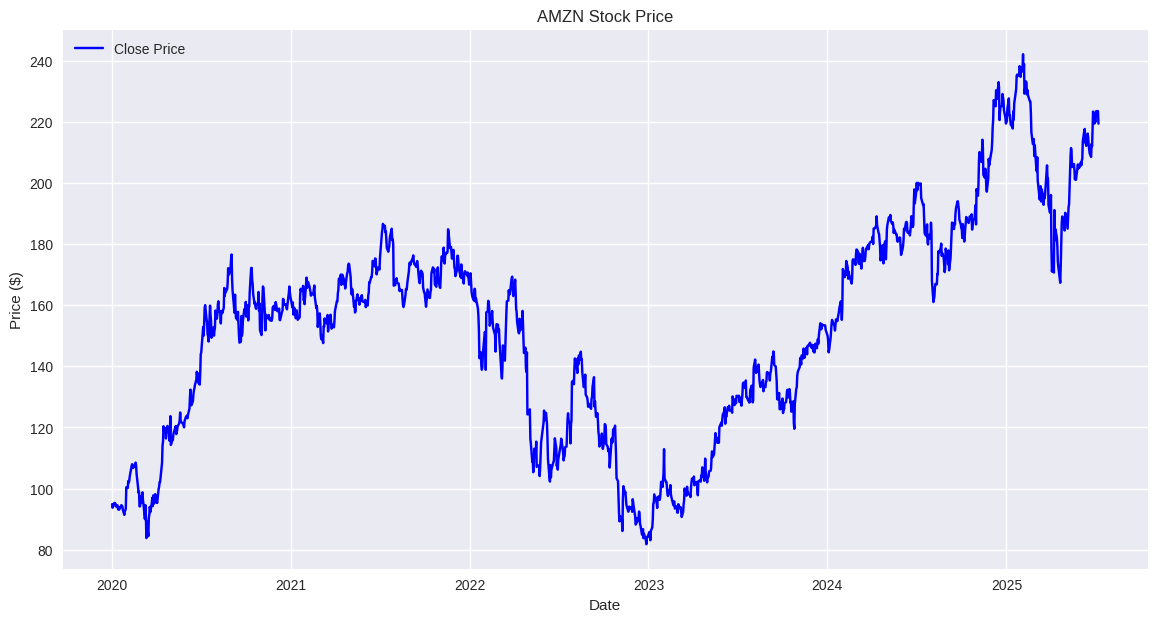

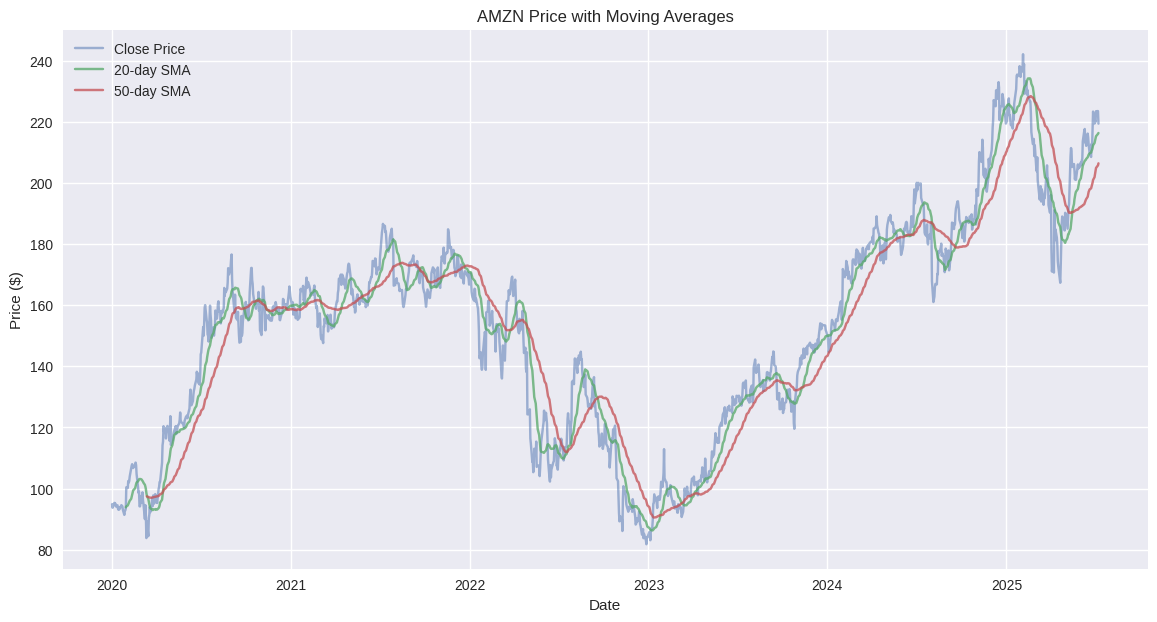

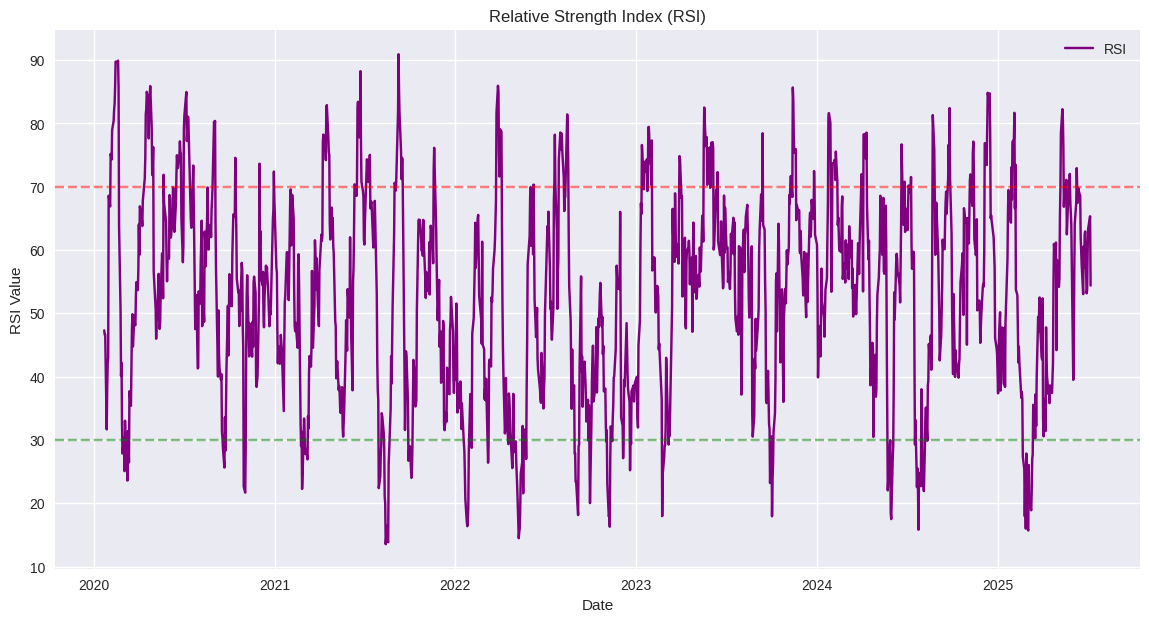

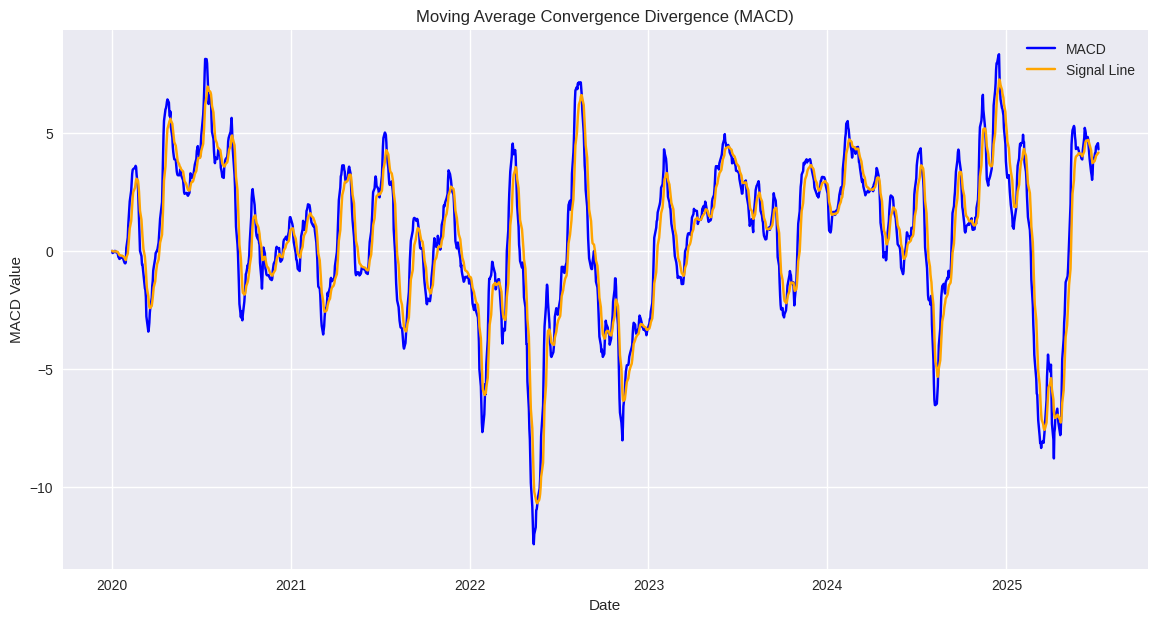

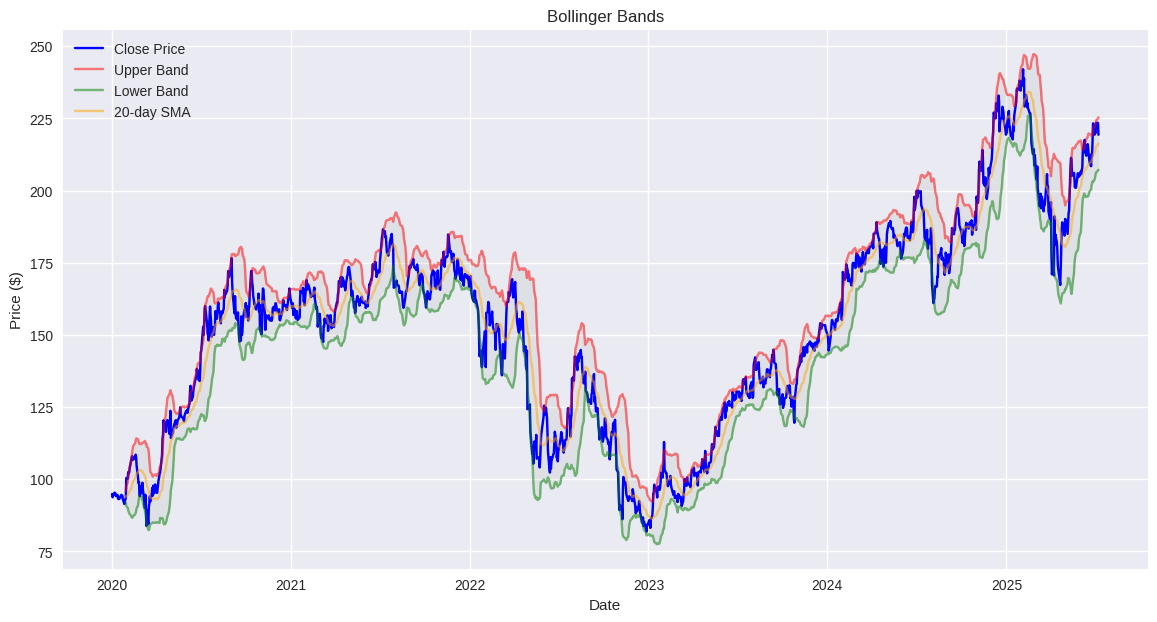

Preparing data for model...


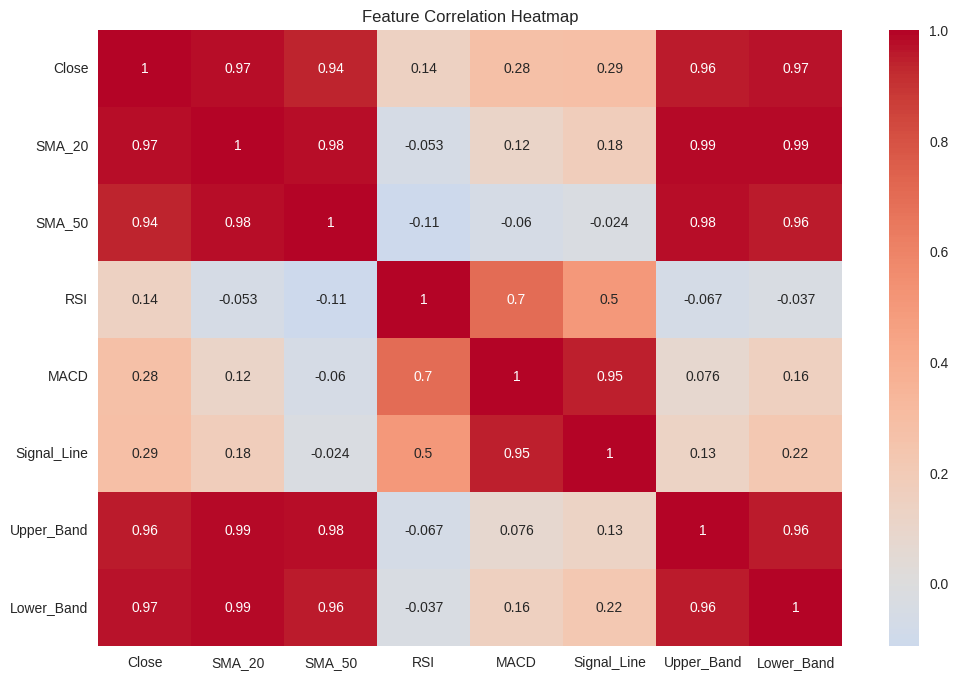

Building model...
Training model...
Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.4770 - loss: 0.7001 - val_accuracy: 0.5364 - val_loss: 0.6924
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.4805 - loss: 0.6945 - val_accuracy: 0.5172 - val_loss: 0.6919
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.4799 - loss: 0.6987 - val_accuracy: 0.5172 - val_loss: 0.6920
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.4791 - loss: 0.6972 - val_accuracy: 0.5402 - val_loss: 0.6924
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5225 - loss: 0.6926 - val_accuracy: 0.4828 - val_loss: 0.6948
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5115 - loss: 0.6924 - val_accuracy: 0.5057 - val_loss: 0.6928
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5457 - loss: 0.6903 - val_accuracy: 0.4828 - val_loss: 0.6933
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.5135 - los

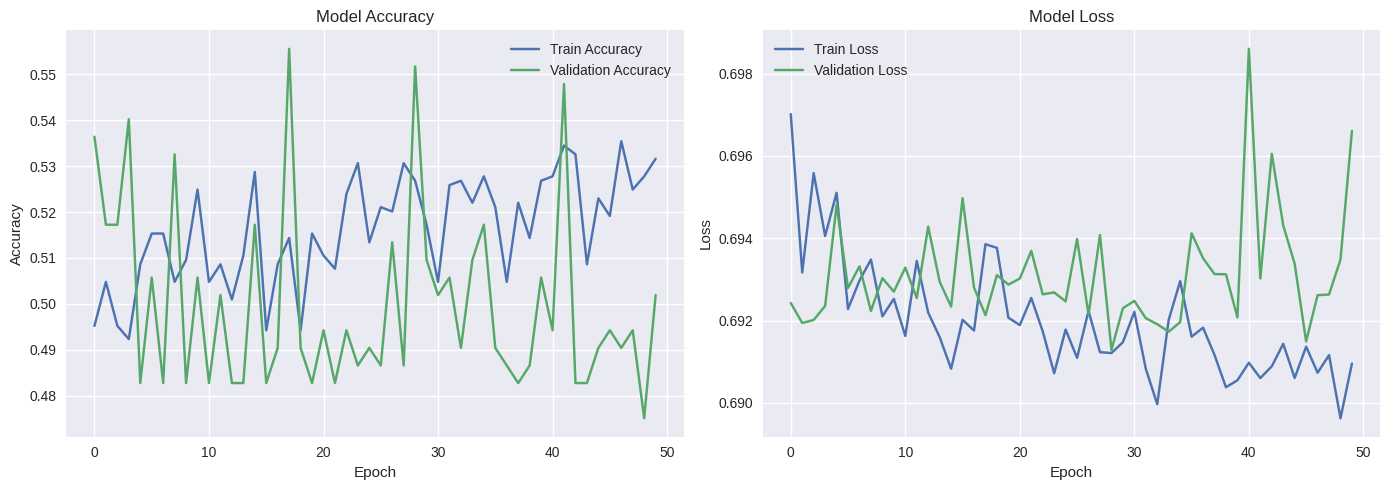

Evaluating model...
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step
Test Accuracy: 50.19%
Precision: 63.16%
Recall: 8.89%
F1 Score: 15.58%

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.94      0.65       126
           1       0.63      0.09      0.16       135

    accuracy                           0.50       261
   macro avg       0.56      0.52      0.40       261
weighted avg       0.56      0.50      0.39       261



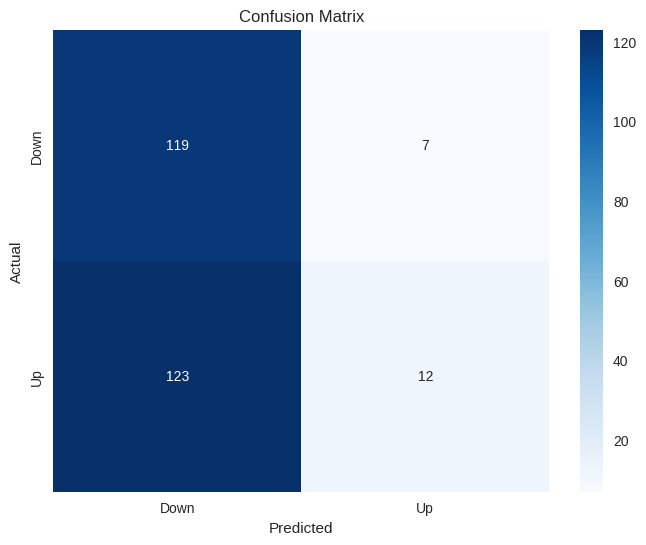

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


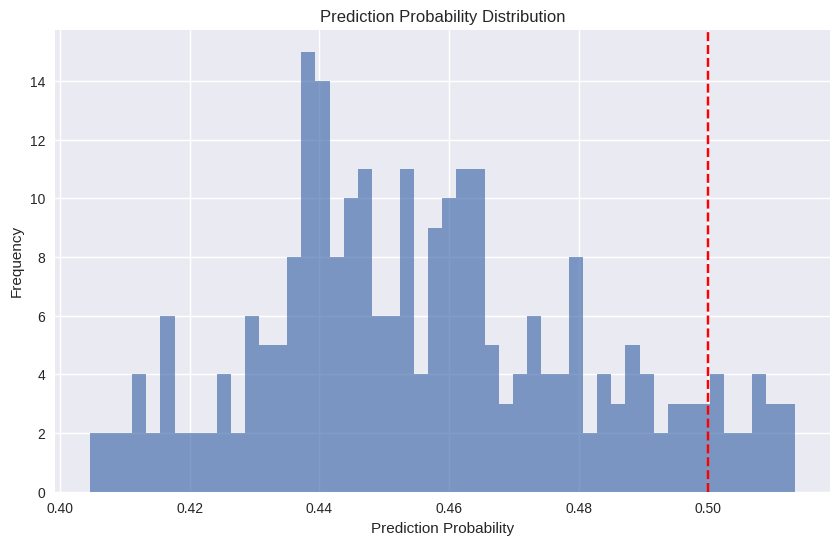

Backtesting strategy...
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


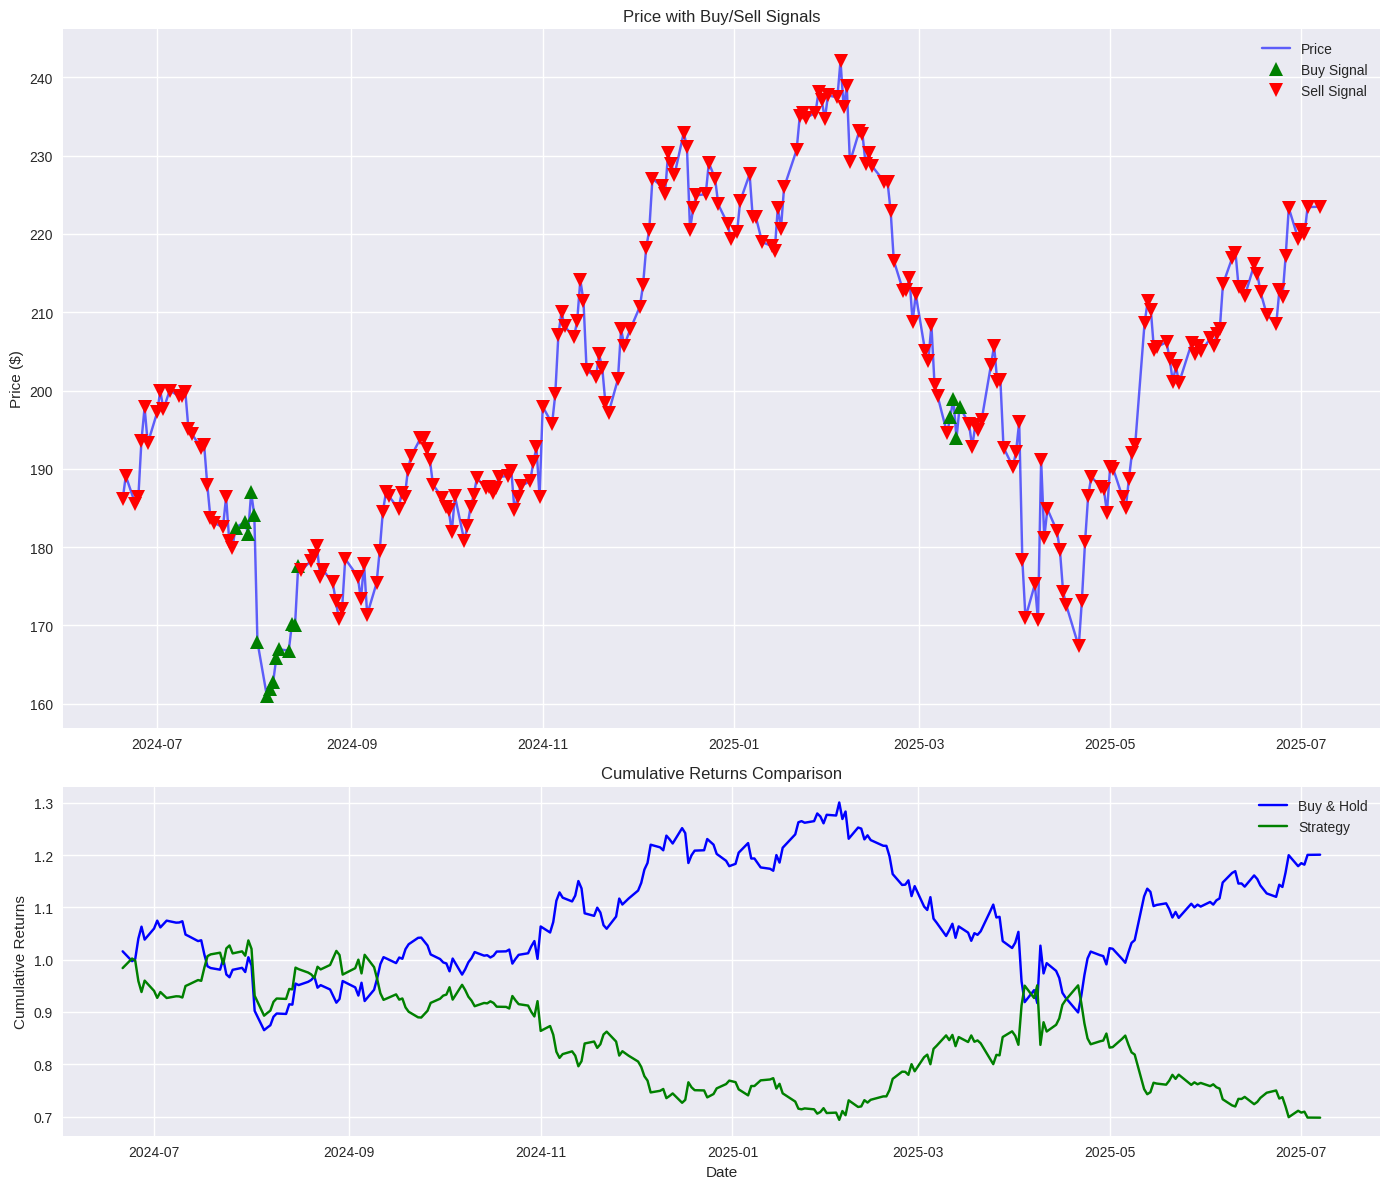

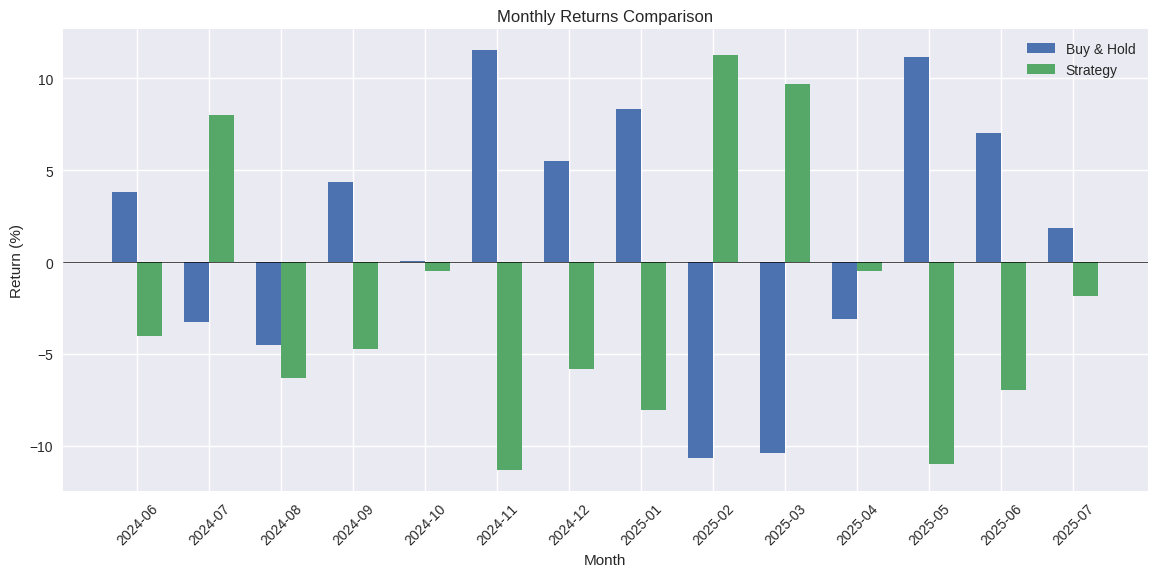

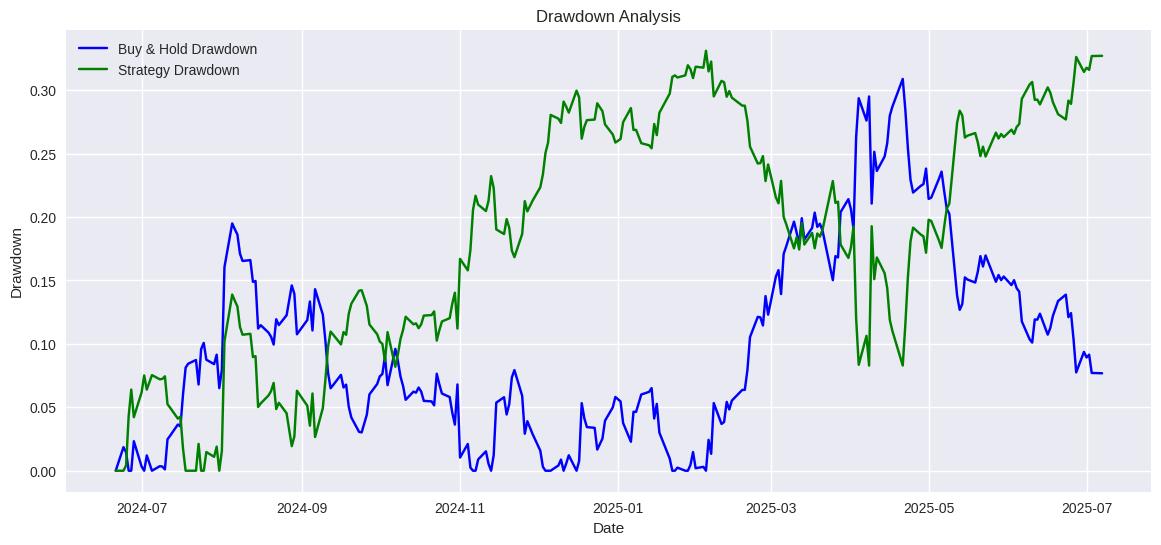

Model saved successfully.


In [13]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, confusion_matrix, classification_report)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Configuration
TICKER = 'AMZN'
START_DATE = '2020-01-01'
END_DATE = datetime.now().strftime('%Y-%m-%d')
SEQ_LENGTH = 30  # Number of days to look back
TEST_SIZE = 0.2  # Percentage of data for testing

# Set matplotlib style
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = [12, 6]

def download_data(ticker, start_date, end_date):
    """Download stock data from Yahoo Finance"""
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

def calculate_technical_indicators(df):
    """Add basic technical indicators to the dataframe with visualization"""
    # Original Price Plot
    plt.figure(figsize=(14, 7))
    plt.plot(df['Close'], label='Close Price', color='blue')
    plt.title(f'{TICKER} Stock Price')
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.show()

    # Calculate indicators
    df['SMA_20'] = df['Close'].rolling(window=20).mean()
    df['SMA_50'] = df['Close'].rolling(window=50).mean()

    # Moving Averages Plot
    plt.figure(figsize=(14, 7))
    plt.plot(df['Close'], label='Close Price', alpha=0.5)
    plt.plot(df['SMA_20'], label='20-day SMA', alpha=0.75)
    plt.plot(df['SMA_50'], label='50-day SMA', alpha=0.75)
    plt.title(f'{TICKER} Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.show()

    # RSI Calculation
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))

    # RSI Plot
    plt.figure(figsize=(14, 7))
    plt.plot(df['RSI'], label='RSI', color='purple')
    plt.axhline(70, linestyle='--', color='red', alpha=0.5)
    plt.axhline(30, linestyle='--', color='green', alpha=0.5)
    plt.title('Relative Strength Index (RSI)')
    plt.xlabel('Date')
    plt.ylabel('RSI Value')
    plt.legend()
    plt.show()

    # MACD Calculation
    exp12 = df['Close'].ewm(span=12, adjust=False).mean()
    exp26 = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = exp12 - exp26
    df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

    # MACD Plot
    plt.figure(figsize=(14, 7))
    plt.plot(df['MACD'], label='MACD', color='blue')
    plt.plot(df['Signal_Line'], label='Signal Line', color='orange')
    plt.title('Moving Average Convergence Divergence (MACD)')
    plt.xlabel('Date')
    plt.ylabel('MACD Value')
    plt.legend()
    plt.show()

    # Bollinger Bands
    rolling_mean = df['Close'].rolling(window=20).mean()
    rolling_std = df['Close'].rolling(window=20).std()
    df['Upper_Band'] = rolling_mean + (2 * rolling_std)
    df['Lower_Band'] = rolling_mean - (2 * rolling_std)

    # Bollinger Bands Plot
    plt.figure(figsize=(14, 7))
    plt.plot(df['Close'], label='Close Price', color='blue')
    plt.plot(df['Upper_Band'], label='Upper Band', color='red', alpha=0.5)
    plt.plot(df['Lower_Band'], label='Lower Band', color='green', alpha=0.5)
    plt.plot(df['SMA_20'], label='20-day SMA', color='orange', alpha=0.5)
    plt.fill_between(df.index, df['Upper_Band'], df['Lower_Band'], color='grey', alpha=0.1)
    plt.title('Bollinger Bands')
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.show()

    # Drop NaN values
    df.dropna(inplace=True)

    return df

def prepare_data(df, seq_length):
    """Prepare data for LSTM model"""
    # Select features
    features = ['Close', 'SMA_20', 'SMA_50', 'RSI', 'MACD', 'Signal_Line', 'Upper_Band', 'Lower_Band']
    data = df[features].values

    # Create target (1 if next day's price is higher, 0 otherwise)
    target = (df['Close'].shift(-1) > df['Close']).astype(int).values
    target = target[:-1]  # Remove last row which has NaN
    data = data[:-1]      # Align with target

    # Normalize features
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    # Feature Correlation Heatmap
    corr_matrix = pd.DataFrame(scaled_data, columns=features).corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Feature Correlation Heatmap')
    plt.show()

    # Create sequences
    X, y = [], []
    for i in range(len(scaled_data) - seq_length):
        X.append(scaled_data[i:i+seq_length])
        y.append(target[i+seq_length-1])

    return np.array(X), np.array(y), scaler

def build_lstm_model(input_shape):
    """Build a simple LSTM model"""
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(50),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

def evaluate_model(model, X_test, y_test):
    """Evaluate model performance with comprehensive visualizations"""
    y_pred = (model.predict(X_test) > 0.5).astype(int)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Test Accuracy: {accuracy:.2%}")
    print(f"Precision: {precision:.2%}")
    print(f"Recall: {recall:.2%}")
    print(f"F1 Score: {f1:.2%}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Prediction Distribution
    plt.figure(figsize=(10, 6))
    plt.hist(model.predict(X_test), bins=50, alpha=0.7)
    plt.axvline(0.5, color='red', linestyle='--')
    plt.title('Prediction Probability Distribution')
    plt.xlabel('Prediction Probability')
    plt.ylabel('Frequency')
    plt.show()

    return accuracy

def backtest_strategy(df, predictions, test_start_idx):
    """Backtest a simple trading strategy with enhanced visualizations"""
    # Create a copy of the dataframe for the test period
    test_df = df.iloc[test_start_idx + SEQ_LENGTH:-1].copy()
    test_df = test_df.iloc[:len(predictions)]  # Ensure same length as predictions

    test_df['Prediction'] = predictions

    # Simple strategy: Buy when prediction > 0.5, Sell when < 0.5
    test_df['Position'] = 0
    test_df.loc[test_df['Prediction'] > 0.5, 'Position'] = 1
    test_df.loc[test_df['Prediction'] < 0.5, 'Position'] = -1

    # Calculate daily returns
    test_df['Market_Return'] = test_df['Close'].pct_change()
    test_df['Strategy_Return'] = test_df['Position'].shift(1) * test_df['Market_Return']

    # Calculate cumulative returns
    test_df['Cumulative_Market'] = (1 + test_df['Market_Return']).cumprod()
    test_df['Cumulative_Strategy'] = (1 + test_df['Strategy_Return']).cumprod()

    # Plot results
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12), gridspec_kw={'height_ratios': [2, 1]})

    # Price and Positions
    ax1.plot(test_df['Close'], label='Price', color='blue', alpha=0.6)
    ax1.plot(test_df[test_df['Position'] == 1].index,
             test_df['Close'][test_df['Position'] == 1],
             '^', markersize=10, color='g', label='Buy Signal')
    ax1.plot(test_df[test_df['Position'] == -1].index,
             test_df['Close'][test_df['Position'] == -1],
             'v', markersize=10, color='r', label='Sell Signal')
    ax1.set_title('Price with Buy/Sell Signals')
    ax1.set_ylabel('Price ($)')
    ax1.legend()

    # Cumulative Returns
    ax2.plot(test_df['Cumulative_Market'], label='Buy & Hold', color='blue')
    ax2.plot(test_df['Cumulative_Strategy'], label='Strategy', color='green')
    ax2.set_title('Cumulative Returns Comparison')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Cumulative Returns')
    ax2.legend()

    plt.tight_layout()
    plt.show()

    # Monthly Returns Comparison
    monthly_returns = test_df[['Market_Return', 'Strategy_Return']].resample('M').apply(
        lambda x: (1 + x).prod() - 1)

    plt.figure(figsize=(14, 6))
    width = 0.35
    x = np.arange(len(monthly_returns))
    plt.bar(x - width/2, monthly_returns['Market_Return'] * 100, width, label='Buy & Hold')
    plt.bar(x + width/2, monthly_returns['Strategy_Return'] * 100, width, label='Strategy')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.title('Monthly Returns Comparison')
    plt.xlabel('Month')
    plt.ylabel('Return (%)')
    plt.xticks(x, monthly_returns.index.strftime('%Y-%m'), rotation=45)
    plt.legend()
    plt.show()

    # Drawdown Analysis
    test_df['Peak_Market'] = test_df['Cumulative_Market'].cummax()
    test_df['Peak_Strategy'] = test_df['Cumulative_Strategy'].cummax()
    test_df['Drawdown_Market'] = (test_df['Peak_Market'] - test_df['Cumulative_Market']) / test_df['Peak_Market']
    test_df['Drawdown_Strategy'] = (test_df['Peak_Strategy'] - test_df['Cumulative_Strategy']) / test_df['Peak_Strategy']

    plt.figure(figsize=(14, 6))
    plt.plot(test_df['Drawdown_Market'], label='Buy & Hold Drawdown', color='blue')
    plt.plot(test_df['Drawdown_Strategy'], label='Strategy Drawdown', color='green')
    plt.title('Drawdown Analysis')
    plt.xlabel('Date')
    plt.ylabel('Drawdown')
    plt.legend()
    plt.show()

    return test_df

def main():
    # Step 1: Download and prepare data
    print("Downloading data...")
    data = download_data(TICKER, START_DATE, END_DATE)

    print("Calculating technical indicators...")
    data = calculate_technical_indicators(data)

    print("Preparing data for model...")
    X, y, scaler = prepare_data(data, SEQ_LENGTH)

    # Split into train and test sets
    split_idx = int(len(X) * (1 - TEST_SIZE))
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    # Step 2: Build and train LSTM model
    print("Building model...")
    model = build_lstm_model((X_train.shape[1], X_train.shape[2]))

    print("Training model...")
    history = model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=32,
        validation_data=(X_test, y_test),
        verbose=1
    )

    # Plot training history
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Step 3: Evaluate model
    print("Evaluating model...")
    accuracy = evaluate_model(model, X_test, y_test)

    # Step 4: Backtest strategy
    print("Backtesting strategy...")
    predictions = (model.predict(X_test) > 0.5).astype(int)
    backtest_results = backtest_strategy(data, predictions, split_idx)

    # Save model
    model.save(f'stock_trading_model_{TICKER}.h5')
    print("Model saved successfully.")

if __name__ == "__main__":
    main()